<a href="https://colab.research.google.com/github/nusfeiwei/RPassignment/blob/main/BASIS_FUNCTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a program in python to implement the MLE that employs basis functions to solve the polynomial curve fitting problem. Follow the instructions below:
1. Generate 50 2D-data points using the following function: 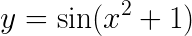
2. Add Gaussian random noise to the data
3. Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.
4. Show your results for different values of M that generate overfitting and underfitting curves.
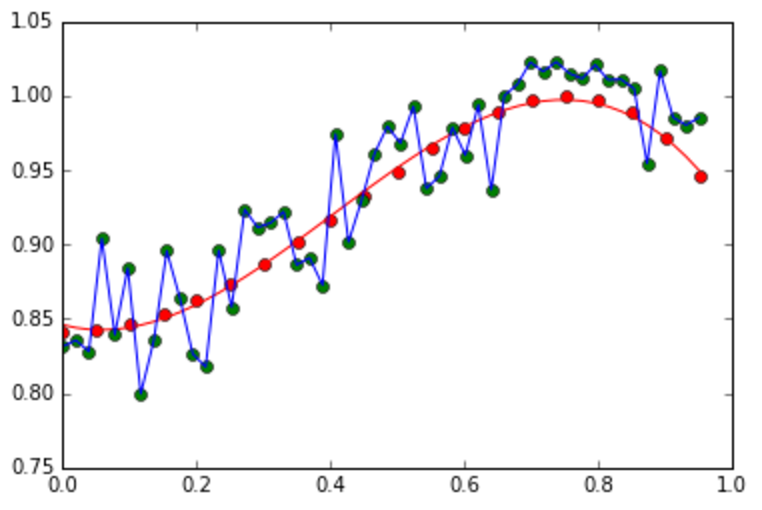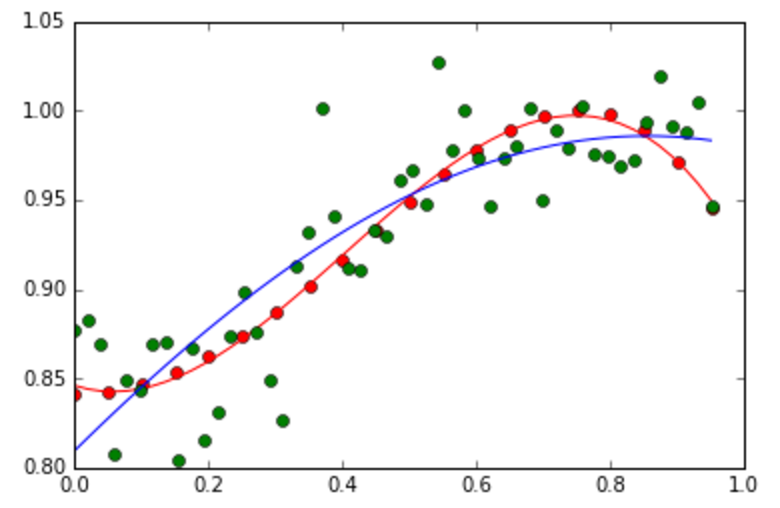
5. Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.
6. Change the original curve function to 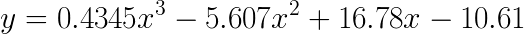, and use the sigmoid basis function to estimate the best curve fitting from the noisy data.
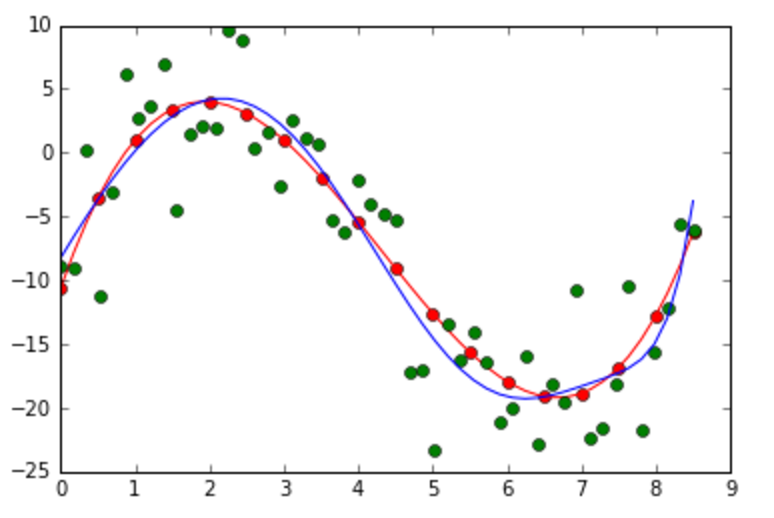
7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.

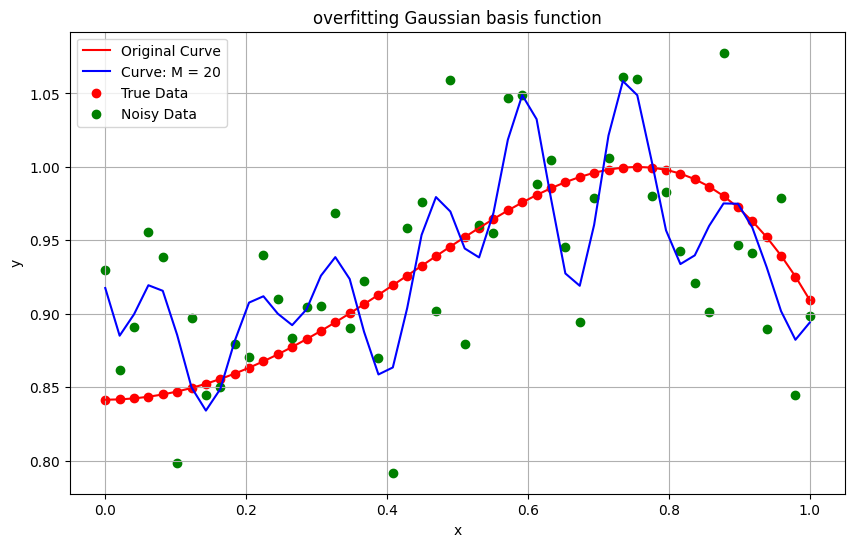

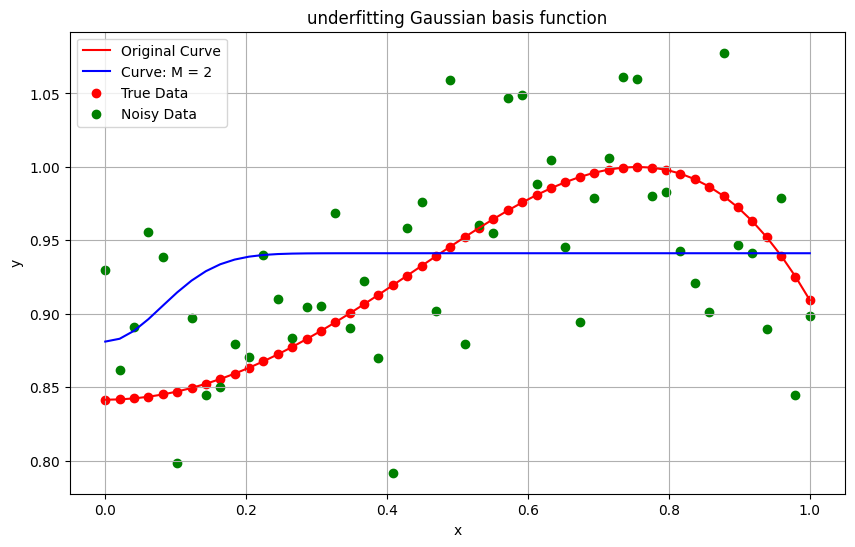

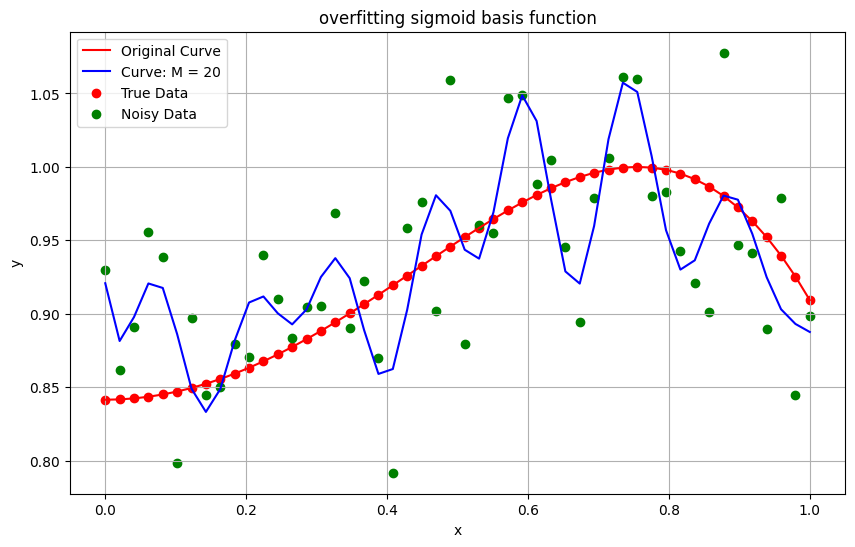

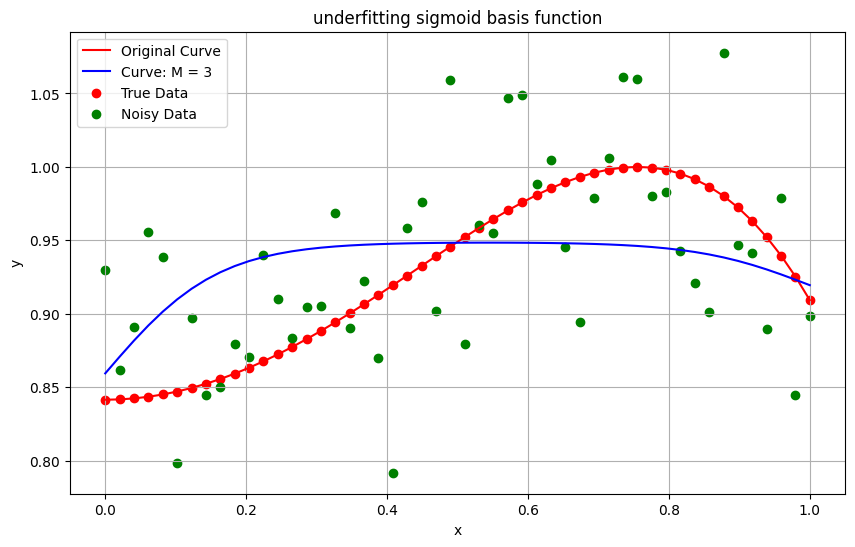

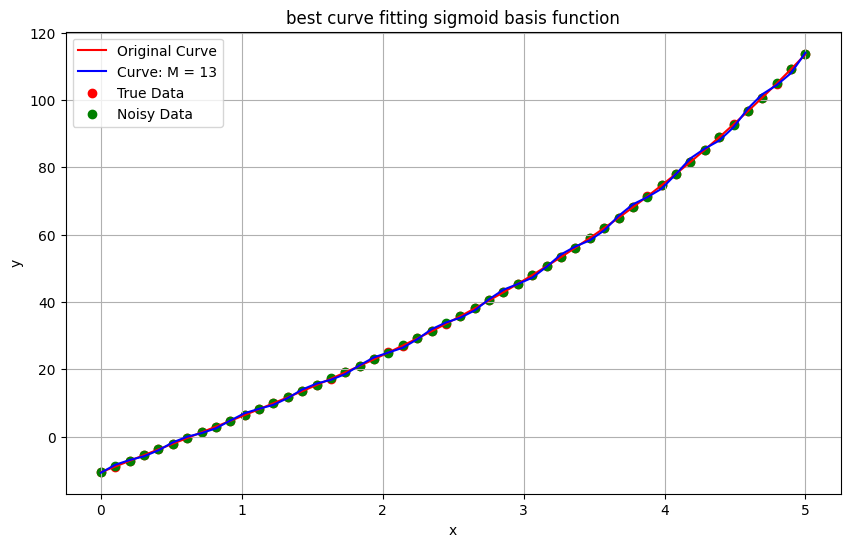

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#0 random reproducibility

np.random.seed(0)  # for reproducibility


#1. Generate 50 2D-data points using the following function

x = np.linspace(0, 1, 50)
#print(x, x.shape)
y_true = np.sin(np.square(x) + 1)
#print(y_true, y_true.shape)


#2. Add Gaussian random noise to the data

noise = np.random.normal(0, 0.05, y_true.shape)
#print(noise, noise.shape)

y_noisy = y_true + noise
#print(y_noisy, y_noisy.shape)


#3. Fit the generated noisy data using the MLE that employs the Gaussian basis
#   functions as discussed in class

def basis_function_fitting_gaussian(x, t, M):
    """
    basis function curve fitting using MLE gaussian
    """

    # initialize the parameters (μ and s) for the basis functions
    mu_values = np.linspace(x.min(), x.max(), M - 1)
    s_values = np.ones(M) * 0.08

    # design matrix Phi
    Phi = np.zeros((len(x), M))
    for i in range(M - 1):
        Phi[:, i + 1] = np.exp(-(x - mu_values[i])**2 / (2 * s_values[i]**2))
        #print(i)

    Phi[:, 0] = 1
    #print(Phi)
    #print(Phi.shape)

    # Calculate weights
    w = np.linalg.pinv(Phi).dot(t)
    #print('w = ', w.shape)

    y_pred_gaussian = Phi @ w

    return w, Phi, y_pred_gaussian


def plotplot(x, y_true, y_pred, y_noisy, M, title):
    """
    plot the Polynomial Curve Fitting result
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_true, 'r-', label='Original Curve')
    plt.plot(x, y_pred, 'b-', label= f'Curve: M = {M}')
    plt.scatter(x, y_true, color='r', marker='o', label='True Data')
    #plt.scatter(x, y_pred, color='b', marker='o', label='Predict Data')
    plt.scatter(x, y_noisy, color='g', marker='o', label='Noisy Data')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

M = 5  # Degree of the polynomial
w, Phi, y_pred_gaussian = basis_function_fitting_gaussian(x, y_noisy, M)


#plotplot(x, y_true, y_pred, y_noisy, M)

#4. Show your results for different values of M that generate overfitting
#   and underfitting curves

title = 'overfitting Gaussian basis function'
M = 20  # Degree of the polynomial
w, Phi, y_pred_gaussian = basis_function_fitting_gaussian(x, y_noisy, M)
#print(w)

plotplot(x, y_true, y_pred_gaussian, y_noisy, M, title)


title = 'underfitting Gaussian basis function'
M = 2  # Degree of the polynomial
w, Phi, y_pred_gaussian = basis_function_fitting_gaussian(x, y_noisy, M)
#print(w)

plotplot(x, y_true, y_pred_gaussian, y_noisy, M, title)

#5. Change the basis functions to the sigmoid basis functions, and show the
#   results for different values of M that generate overfitting and
#   underfitting curves.

def basis_function_fitting_sigmoid(x, t, M):
    """
    basis function curve fitting using MLE sigmoid
    """

    # initialize the parameters (μ and s) for the basis functions
    mu_values = np.linspace(x.min(), x.max(), M - 1)
    s_values = np.ones(M) * 0.08

    # design matrix Phi
    Phi = np.zeros((len(x), M))
    for i in range(M - 1):
        Phi[:, i + 1] = 1 / (1 + np.exp(-(x - mu_values[i]) / s_values[i]))
    Phi[:, 0] = 1
    #print(Phi)
    #print(Phi.shape)

    # Calculate weights
    w = np.linalg.pinv(Phi).dot(t)
    #print('w = ', w.shape)

    y_pred_sigmoid = Phi @ w

    return w, Phi, y_pred_sigmoid

title = 'overfitting sigmoid basis function'
M = 20  # Degree of the polynomial
w, Phi, y_pred_sigmoid = basis_function_fitting_sigmoid(x, y_noisy, M)
#print(w)

plotplot(x, y_true, y_pred_sigmoid, y_noisy, M, title)

title = 'underfitting sigmoid basis function'
M = 3  # Degree of the polynomial
w, Phi, y_pred_sigmoid = basis_function_fitting_sigmoid(x, y_noisy, M)
#print(w)

plotplot(x, y_true, y_pred_sigmoid, y_noisy, M, title)

#6. Change the original curve function to image.png, and use the sigmoid basis
#   function to estimate the best curve fitting from the noisy data.

x_new = np.linspace(0, 5, 50)
y_true_new = 0.4345 * x_new**3 - 0.5607 * x_new**2 + 16.78 * x_new - 10.61
y_noisy_new = y_true_new + noise

title = 'best curve fitting sigmoid basis function'
M = 13  # Degree of the polynomial
w, Phi, y_pred_sigmoid = basis_function_fitting_sigmoid(x_new, y_noisy_new, M)
#print(w)

plotplot(x_new, y_true_new, y_pred_sigmoid, y_noisy_new, M, title)



#7. Experiment with different parameters of the Gaussian and sigmoid basis
#   functions, and then show the plot. Also, discuss the advantages of these
#   basis functions over polynomial functions.

